# Agglomerative Clustering using Hierarchical Method

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs,load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [13]:
x, _ = make_blobs(n_samples=50,centers=2,cluster_std = 1.7)

> make_blobs:

* This function generates a synthetic dataset for clustering.
* It creates clusters of points, useful for testing clustering algorithms like KMeans.

> n_samples=50:

* This sets the total number of data points (50 in this case).

> centers=2:

* Specifies the number of cluster centers (2 here).
* The function will generate data around 2 distinct centers.

> cluster_std=1.7:

* cluster_std determines the spread of the data points around each center.
* A higher value (like 1.7) means the clusters will be more dispersed.

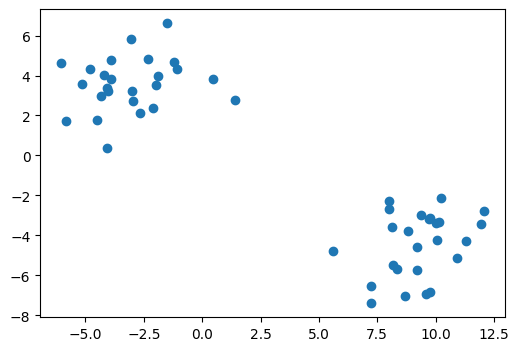

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0],x[:,1])
plt.show()

In [12]:
linkage_metrix = linkage(x, method="ward")

> linkage:
* The linkage function in the scipy.cluster.hierarchy module performs hierarchical (agglomerative) clustering.
* It returns a linkage matrix, which contains information about the clustering hierarchy.

> method="ward":
* Specifies the Ward's method for clustering.
* Ward’s method minimizes the variance within clusters as it merges clusters.

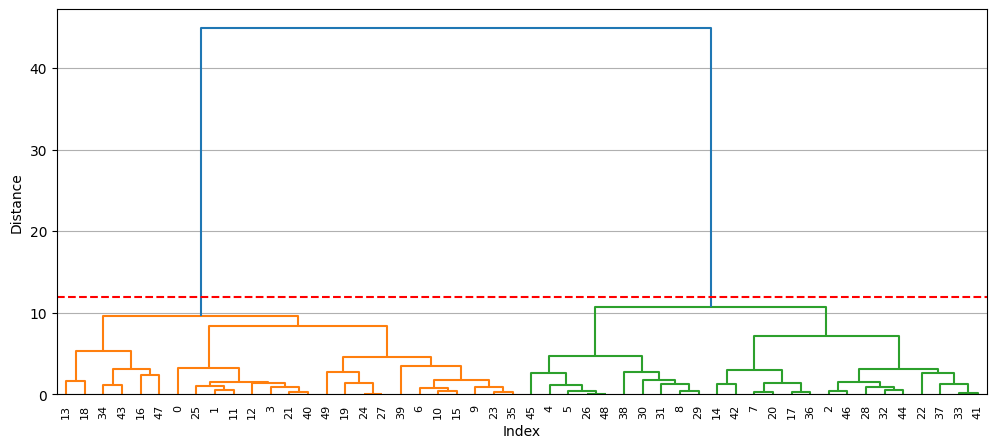

In [21]:
plt.figure(figsize=(12,5))
dendrogram(linkage_metrix)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.grid(axis="y")
plt.axhline(12,ls="--",color="red")
plt.show()

In [22]:
model = AgglomerativeClustering(n_clusters=2)

In [23]:
pred = model.fit_predict(x)

In [24]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1])

In [25]:
_

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1])

In [26]:
np.allclose(pred,_)

True

> np.allclose(a, b):

* Returns True if all elements of arrays a and b are close to each other within a certain tolerance.
* Returns False otherwise.

In [28]:
silhouette_score(x,pred)

np.float64(0.807647499220724)

> Silhouette Score
* The silhouette_score function is used to evaluate the quality of clustering results. It calculates the Silhouette Coefficient for a dataset and its cluster labels.
* Measures how similar a data point is to its own cluster compared to other clusters.
* It returns a single score between -1 and 1:
* 1: Perfect clustering (each sample is well inside its cluster).
* 0: Overlapping clusters (boundary points).
* -1: Incorrect clustering (samples assigned to the wrong clusters).


In [30]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [31]:
df = pd.DataFrame(wine.data,columns = wine.feature_names)
df["target"] = wine.target

In [32]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


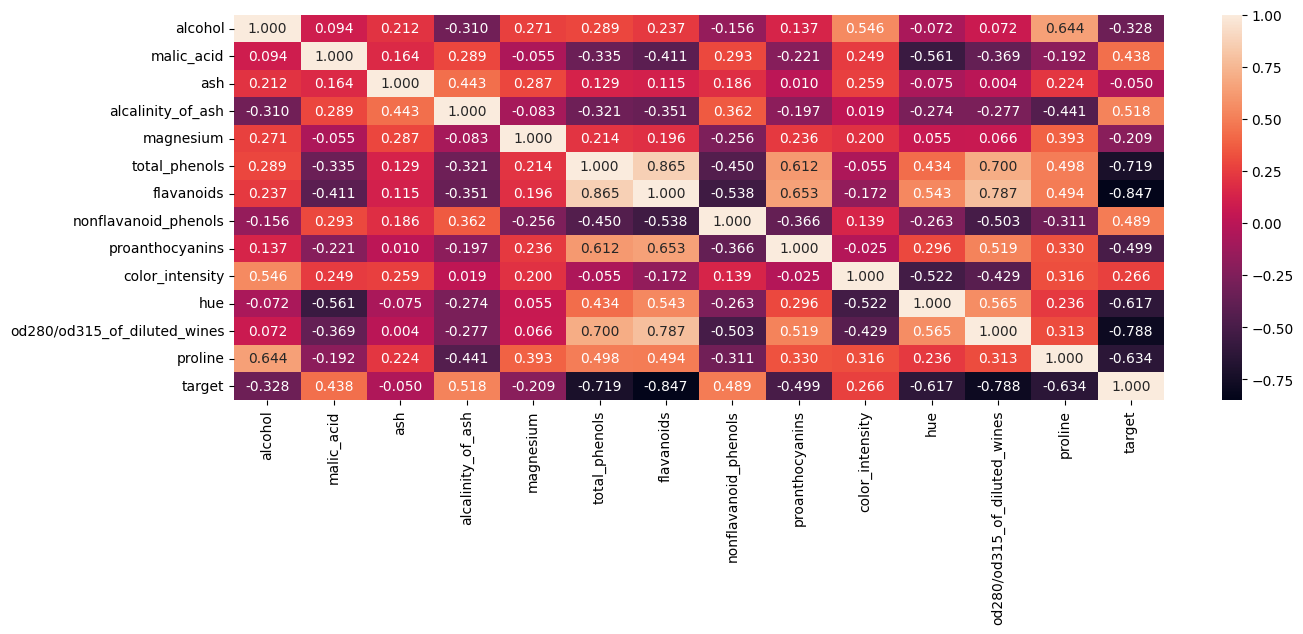

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,fmt=".3f")
plt.show()

In [37]:
wine_linkage = linkage(df.drop("target",axis=1),method="ward")

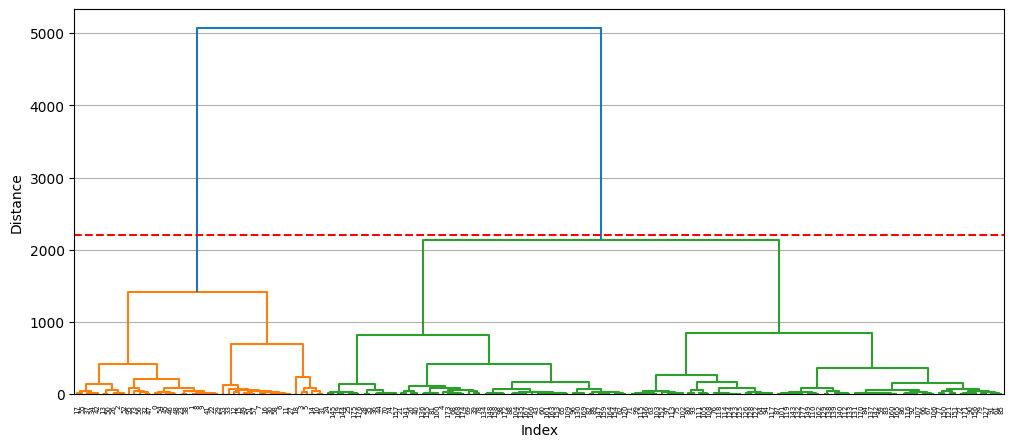

In [40]:
plt.figure(figsize=(12,5))
dendrogram(wine_linkage)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.grid(axis="y")
plt.axhline(2200,ls="--",color="red")
plt.show()

In [42]:
wine_group = AgglomerativeClustering(n_clusters=3)

In [44]:
clusters = wine_group.fit_predict(df.drop("target",axis=1))

In [45]:
silhouette_score(df.drop("target",axis=1),clusters)

np.float64(0.5644796401732068)